1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + features_1
  + features_2
  + features_3
  
Are these features correlated?

<AxesSubplot:>

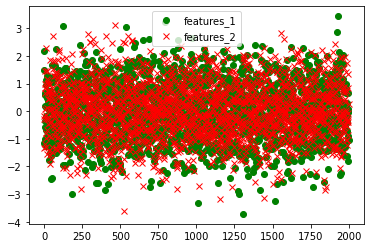

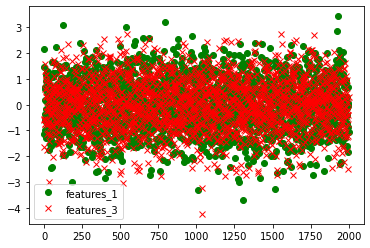

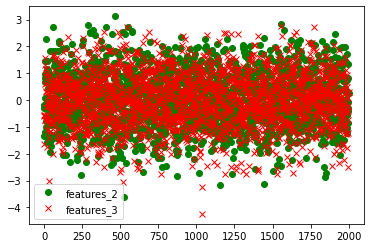

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import scipy 

#H

RG = pd.read_csv('regression_generated.csv')

feat_12 = RG.loc[:,["features_1","features_2"]]
feat_12.plot(style = ['go','rx'])


feat_13 = RG.loc[:,["features_1","features_3"]]
feat_13.plot(style =  ['go','rx'])

#features_2 and features_3
feat_23 = RG.loc[:,["features_2","features_3"]]
feat_23.plot(style =  ['go','rx'])

2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

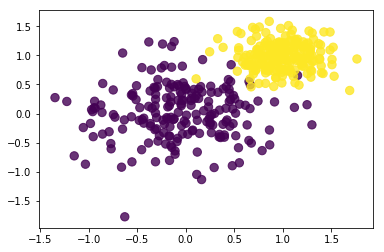

In [4]:
from IPython.display import Image
Image('images/two_categories_scatter_plot.png')

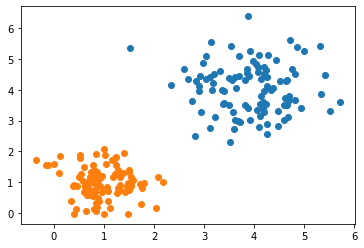

In [5]:

def gaussian(mean,sta_dev) : 
    return np.random.normal(mean,sta_dev,100
                           )
#CAT1
x1 = gaussian(4,0.8)
y1 = gaussian(4,0.8)
plt.scatter(x1,y1)
#CAT2
x2 = gaussian(1,0.5)
y2 = gaussian(1,0.5)
plt.scatter(x2,y2)

plt.show()

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

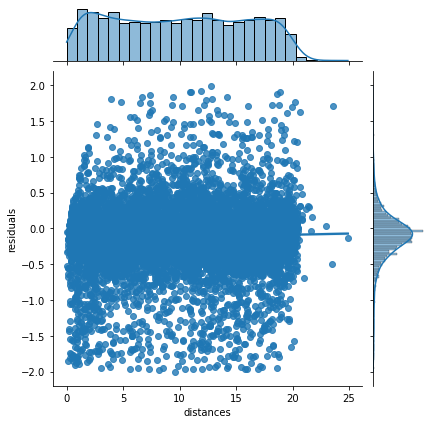

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import scipy 

file = pickle.load(open("./residuals_261.pkl", "rb"))


res = pd.DataFrame(file.tolist())
res = res[abs(res["residuals"])<2]
res



sns.jointplot(x = "distances", y = "residuals", data = res,kind="reg")

# there is no correlation between the variables

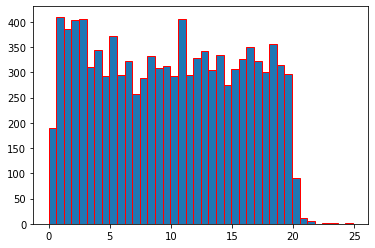

In [7]:

distances = res["distances"].to_numpy() 
n_bins = 40
figure, ax = plt.subplots()
n,edges,_ = ax.hist(distances,bins = n_bins, edgecolor = "r")

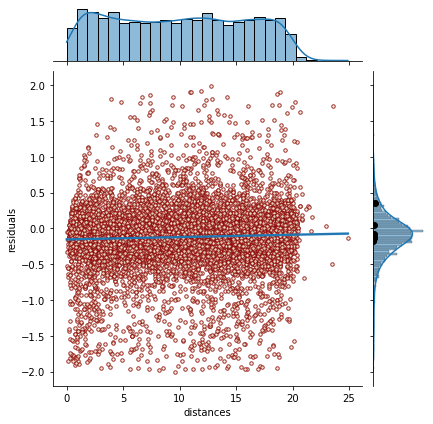

In [8]:
aux = np.linspace(0, 50, 16)
x = np.array((aux[0:15]+aux[1:16])/2)

dux = np.digitize(res["distances"], aux)
y = np.zeros(15)
err_y = np.zeros(15)
for i in range(15):
    y[i] += [res["residuals"][dux == i+1].mean(),]
    err_y[i] += [res["residuals"][dux == i+1].std(),]

sns.jointplot(x="distances", y="residuals", data=res, kind="reg", joint_kws={"scatter_kws":{"color":"beige", "edgecolors":"darkred", "s":12}})
plt.errorbar(x=x, y=y, ecolor="r", fmt="ko")

plt.show()

4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


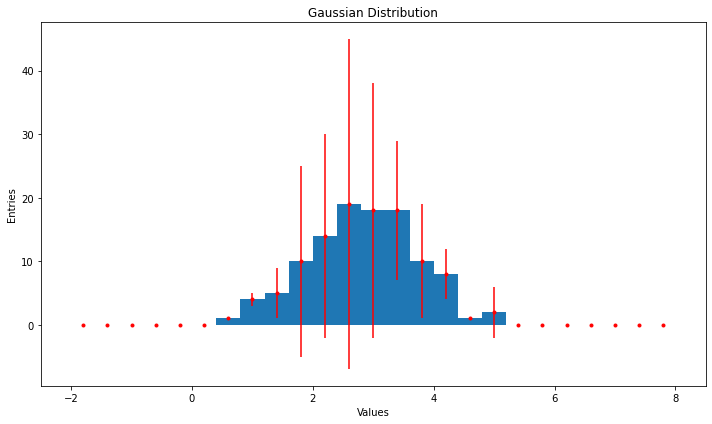

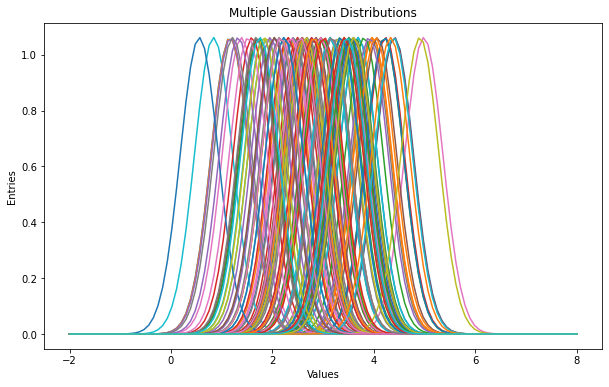

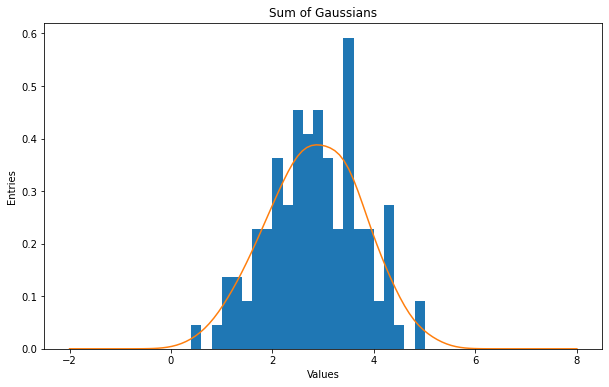

In [9]:


import scipy
import numpy as np
import matplotlib.pyplot as plt

x = np.random.normal(3,1,110)
menStd = np.sqrt(x)
fig = plt.figure(figsize=(10, 6)) 
entries, edges, _ = plt.hist(x, bins=25, range=(-2,8))
bin_centers = 0.5 * (edges[:-1] + edges[1:])
plt.errorbar(bin_centers, entries, yerr=np.random.poisson(entries,25), fmt='r.')
ax = fig.axes[0]
ax.set_title('Gaussian Distribution')
ax.set_xlabel('Values')
ax.set_ylabel('Entries')
fig.tight_layout()
plt.show()

cum=np.zeros(110)
a=[]
fig = plt.figure(figsize=(10, 6)) 
std=1.06*scipy.stats.tstd(x)*(110)**(-0.2)

for el in x:
    t =np.linspace(-2, 8, 110)
    a.append(scipy.stats.norm.pdf(t,el,std) )
    plt.plot(t,a[-1])
    
ax = fig.axes[0]
ax.set_title('Multiple Gaussian Distributions')
ax.set_xlabel('Values')
ax.set_ylabel('Entries')
plt.show()

for val in a:
    for el in range(110):
        cum[el]=cum[el]+val[el]

fig = plt.figure(figsize=(10, 6))
h, bins, _ = plt.hist(x, bins=50, range=(-2,8), density=True, cumulative=False)
plt.plot(t,cum/110) 
ax = fig.axes[0]
ax.set_title('Sum of Gaussians')
ax.set_xlabel('Values')
ax.set_ylabel('Entries')
plt.show()